# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [2]:
# getting the count per class
print(df['left_company'].value_counts())

left_company
No     500
Yes    500
Name: count, dtype: int64


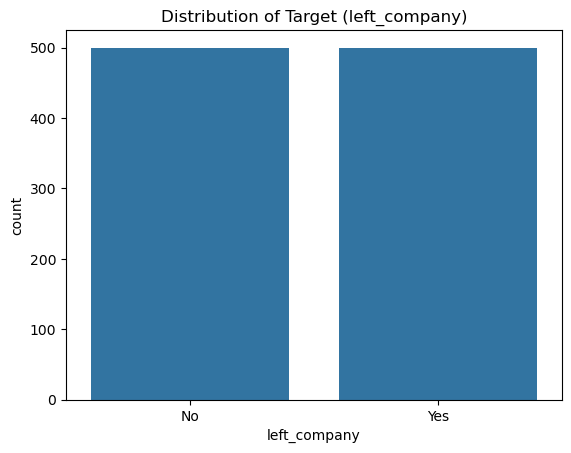

In [3]:
# doing the barplot with count per class
sns.countplot(x='left_company', data=df)
plt.title('Distribution of Target (left_company)')
plt.show()

<b> Looks like our dataset is balanced. So, no, there is not a problem of class imbalance.

# Question 2
- Do a quick EDA
- Can you create new features that captures the relation with the target better?

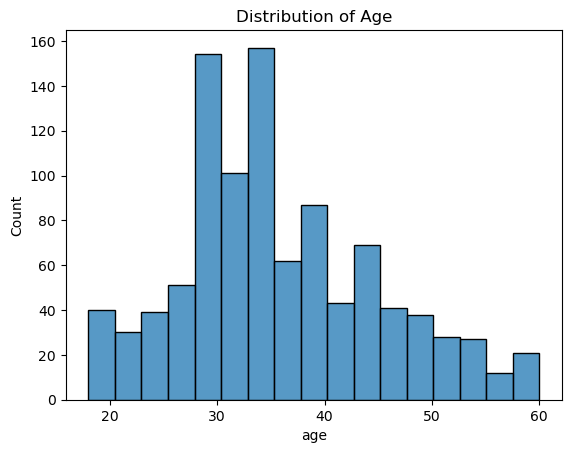

In [4]:
sns.histplot(data = df, x = "age")
plt.title('Distribution of Age')
plt.show()

<b> The age distribution looks normal. Not much outliers. Lots of people are middle aged, which makes sense. 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   left_company                   1000 non-null   object
 1   age                            1000 non-null   int64 
 2   frequency_of_travel            1000 non-null   object
 3   department                     1000 non-null   object
 4   commuting_distance             1000 non-null   int64 
 5   education                      1000 non-null   int64 
 6   satisfaction_with_environment  1000 non-null   int64 
 7   gender                         1000 non-null   object
 8   seniority_level                1000 non-null   int64 
 9   position                       1000 non-null   object
 10  satisfaction_with_job          1000 non-null   int64 
 11  married_or_single              1000 non-null   object
 12  last_raise_pct                 1000 non-null   int64 
 13  last

None of the columns seem to have any null values. There are 1000 rows and 18 columns. Let's verify null count.

In [6]:
# percentage of null per column
df.isnull().sum() / df.shape[0] * 100

left_company                     0.0
age                              0.0
frequency_of_travel              0.0
department                       0.0
commuting_distance               0.0
education                        0.0
satisfaction_with_environment    0.0
gender                           0.0
seniority_level                  0.0
position                         0.0
satisfaction_with_job            0.0
married_or_single                0.0
last_raise_pct                   0.0
last_performance_rating          0.0
total_years_working              0.0
years_at_company                 0.0
years_in_current_job             0.0
years_since_last_promotion       0.0
years_with_current_supervisor    0.0
dtype: float64

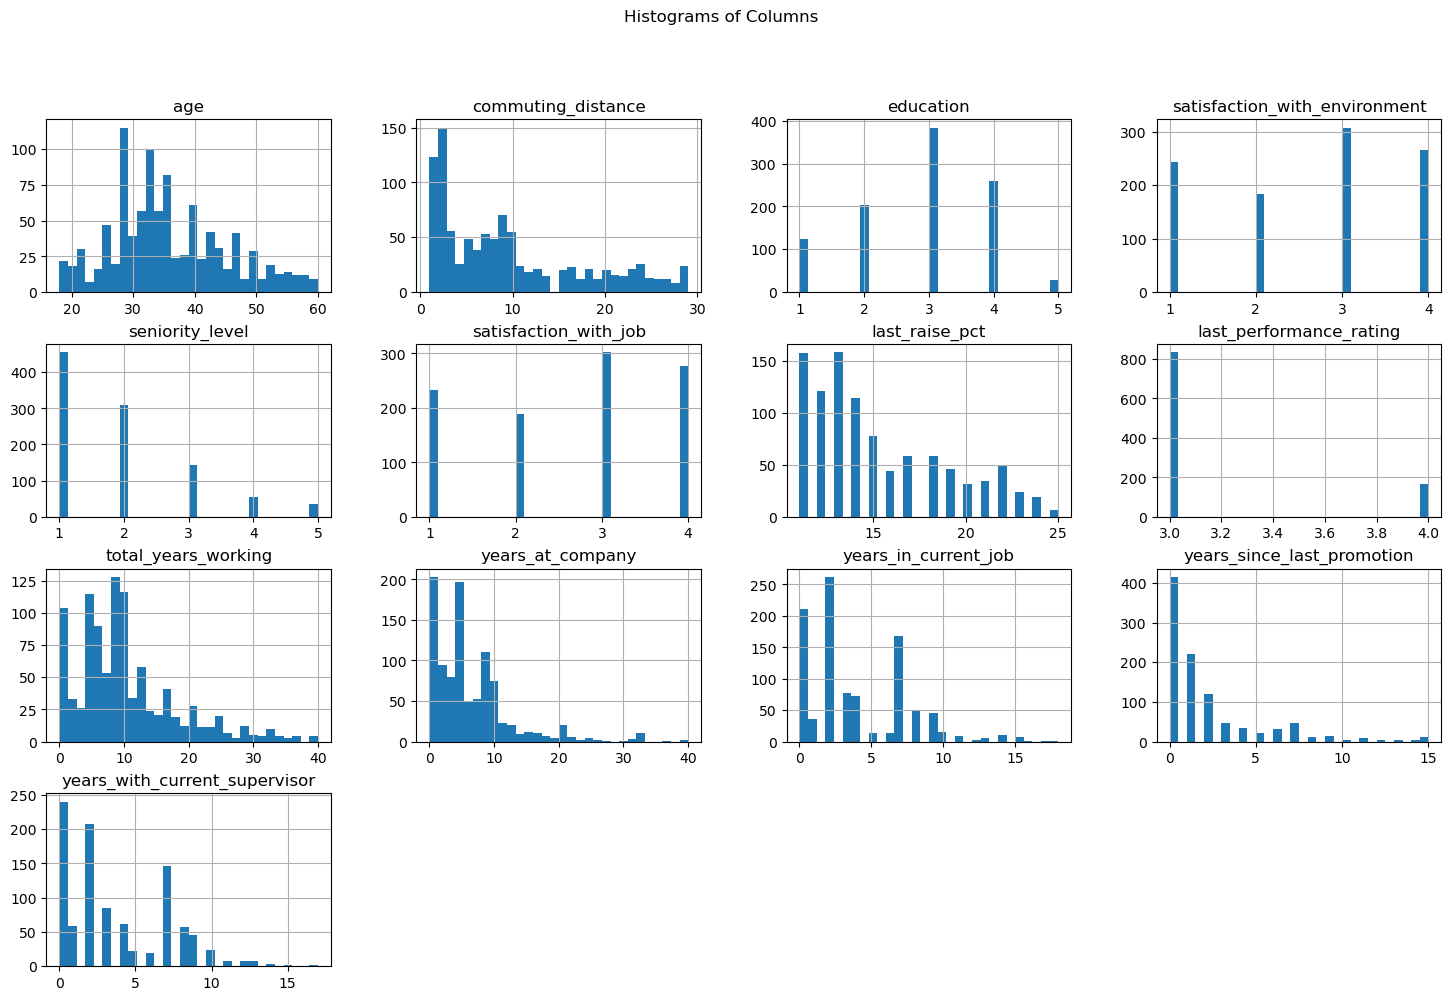

In [7]:
# lets look at the distribution of each of the columns with numeric values (can be both continious and discrete)
df.hist(bins=30, figsize=(18, 11))
plt.suptitle('Histograms of Columns')
plt.show()

Well, the chart makes sense actually. The age is normally distributed (almost). A lot of people seem to live closely to their office. Most people have higher education. I am not sure if the satisfaction column is much helpful as people who are less satisfied are same as people with more staisfaction. Very few people had large percentage of raise. Similarly, the distribution of work experience also makse sense as there are very few seniors and a lot of juniors.

In [8]:
# lets select all categorical columns and look at theirr barplots
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['left_company', 'frequency_of_travel', 'department', 'gender',
       'position', 'married_or_single'],
      dtype='object')

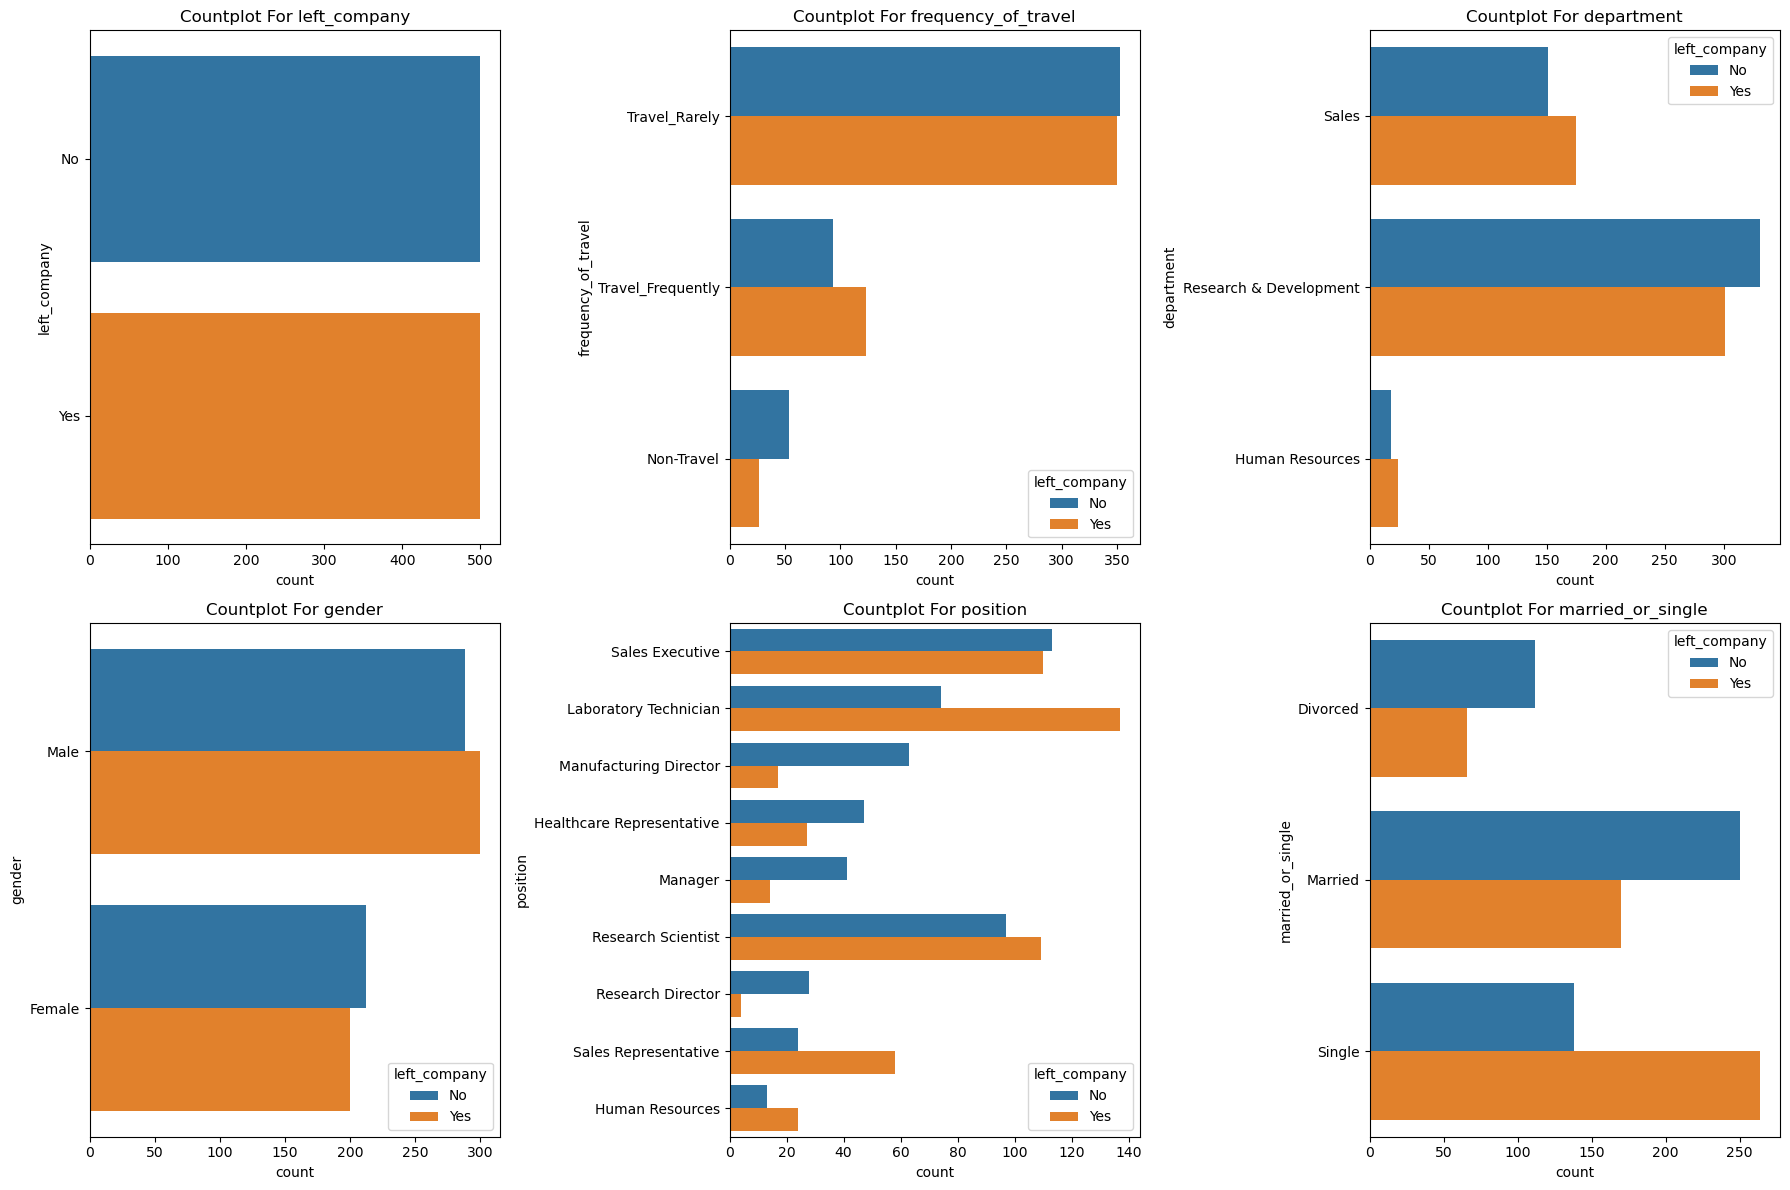

In [9]:
# i will create a subplot with two rows and 3 columns to get barplots for each cateotrical column with data type object
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for ax, column in zip(axes.flatten(), categorical_columns):
    sns.countplot(y=column, data=df, ax=ax, hue='left_company')
    ax.set_title(f'Countplot For {column}')
plt.tight_layout()
plt.show()

Well, a lot of people seem to be belonging to the R&D department. And that makes sense as lot of people seem to belog to a research and technical position. Similarly, lot of single and married men. So, not sure if this column will be useful. Well, a lot less people seem to travel. This should definately have some relation to the target.

I am not sure if there is a significant relation between any one of these categories for a person leaving the company. One thing we can see is married and divorved people seem to leave less whereas single people are leaving more, which makes sense. Other than that, there really is not much interresting story here.

In [10]:
# i will make NO as 0 and YES as 1
df["left_company"] = df["left_company"].map({"No": 0, "Yes": 1})

In [11]:
# getting the list of numeric columns
list_of_columns = list(df.select_dtypes(include=[int, float]).columns[1:])
list_of_columns.append("left_company")

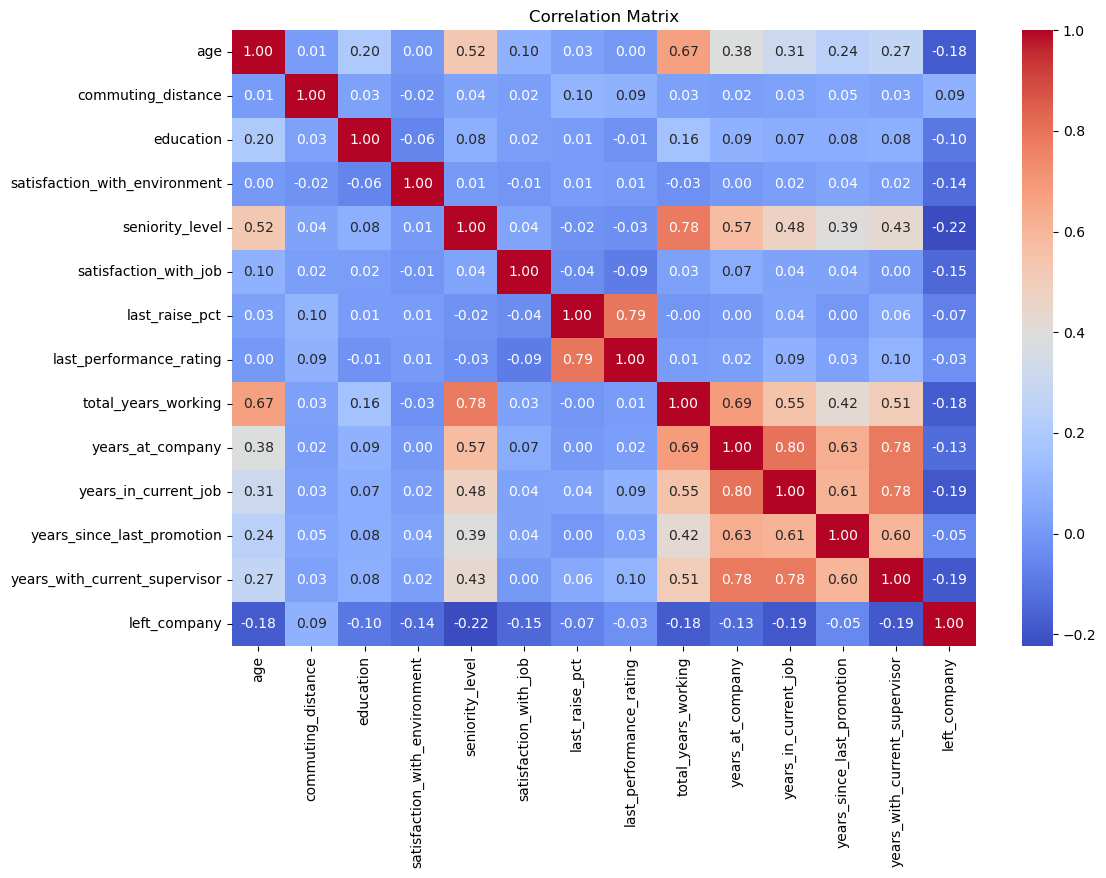

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[list_of_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Interesting, it loks like there is some multicollinearity. It kinda makes sense because a person who has been working a lot at a company probaly has been working a lot with a company will have more time working with their supervisor. Also, they will less likely be leaving the company as shown by the negative correlation.

In [13]:
df["satisfaction_with_environment"].value_counts()

satisfaction_with_environment
3    308
4    266
1    243
2    183
Name: count, dtype: int64

In [14]:
df["satisfaction_with_job"].value_counts()

satisfaction_with_job
3    302
4    276
1    233
2    189
Name: count, dtype: int64

It looks like we have some redundant columns. What i will do is is i will sum their satisfaction and get final satisfaction.

In [15]:
df['total_satisfaction'] = df['satisfaction_with_environment'] + df['satisfaction_with_job']
df['total_satisfaction'].value_counts()

total_satisfaction
5    230
6    196
4    191
7    174
3     84
8     68
2     57
Name: count, dtype: int64

Very few seem to be relatively less satisfied.

Text(0.5, 1.0, 'Total Satisfaction')

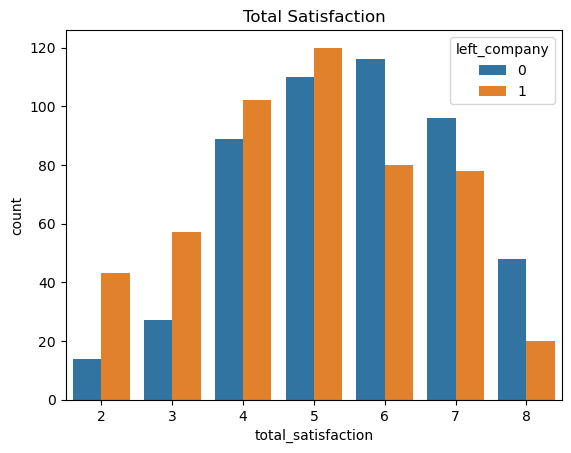

In [16]:
sns.countplot(x = 'total_satisfaction', data = df, hue = 'left_company')
plt.title('Total Satisfaction')

It's slightly better as, if we see in the lower end of satisfaction, more people are leaving whereas people who are highly satisfied, much few people are leaving. Overrall distribution still looks normal.

In [17]:
# now we don;t need these two as well
df.drop(["satisfaction_with_environment", "satisfaction_with_job"], axis=1, inplace=True)

In [18]:
# these are the columns related to work experience.
df[['total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']].head()

,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,9,1,0,0,0
1,11,10,8,0,7
2,31,9,8,0,0
3,19,18,7,0,13
4,10,5,2,2,3


I mean, these columns essentially mean the same stuff. What i can do is, add all of these together to get total years of experience and then categorize them by binning them. Lets see how it looks like.

In [19]:
# summing all years
df['total_years_everything'] = df['total_years_working'] + df['years_at_company'] + df['years_in_current_job'] + df['years_since_last_promotion'] + df['years_with_current_supervisor']

In [20]:
# Binning the total_years_everything column into categorical bins
# these are the ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]

# and their corresponding categories
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', "100+"]
df['total_years_everything'] = pd.cut(df['total_years_everything'], bins=bins, labels=labels, right=False)

Text(0.5, 1.0, 'Total years of experience of pepole who left and stayed')

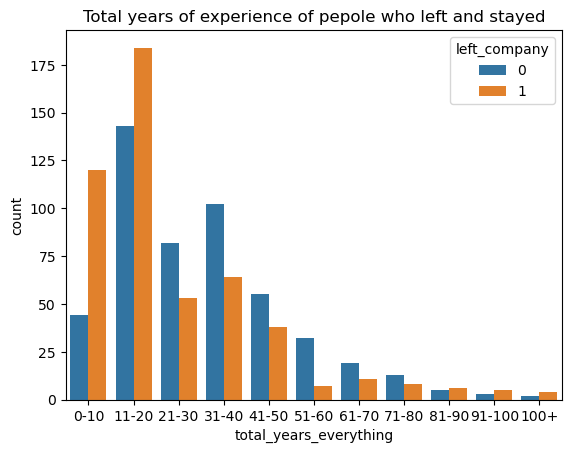

In [21]:
sns.countplot(data = df, x = "total_years_everything", hue = "left_company")
plt.title("Total years of experience of pepole who left and stayed")

Well well well. Now it makes sense. If you look, people with total years experience(including all sorts) with less value tend to leave the company much more often. As their years grow, they seem to stick more. Nice.

In [22]:
# we  don't neeed these columns anymore
useless_years_related_categorical_columns = ['total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']
df.drop(useless_years_related_categorical_columns, axis=1, inplace=True)

<b> I will convert the total_years_everything into a numerical ordered values.

In [23]:
# the .cat.codes attribute will convert the categories into numerical values based on the order of the categories
df['total_years_everything'] = df['total_years_everything'].cat.codes
df['total_years_everything'].head()

0    1
1    3
2    4
3    5
4    2
Name: total_years_everything, dtype: int8

Text(0.5, 1.0, 'Total years of experience of pepole who left and stayed')

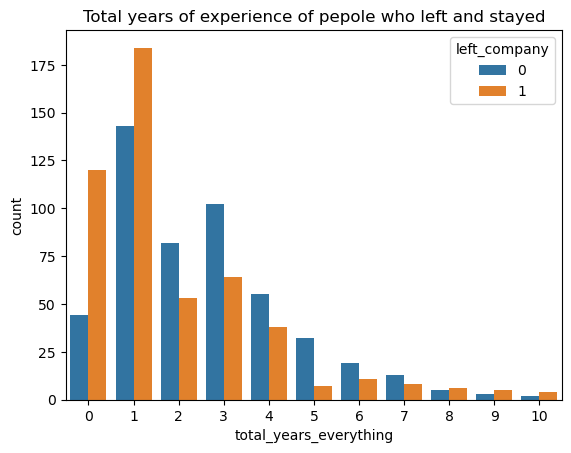

In [24]:
sns.countplot(data = df, x = "total_years_everything", hue = "left_company")
plt.title("Total years of experience of pepole who left and stayed")

In [25]:
df

,left_company,age,frequency_of_travel,department,commuting_distance,education,gender,seniority_level,position,married_or_single,last_raise_pct,last_performance_rating,total_satisfaction,total_years_everything
0,0,37,Travel_Rarely,Sales,16,4,Male,2,Sales Executive,Divorced,19,3,7,1
1,0,39,Travel_Rarely,Research & Development,3,2,Male,2,Laboratory Technician,Divorced,15,3,6,3
2,0,52,Travel_Frequently,Research & Development,25,4,Female,4,Manufacturing Director,Married,22,4,7,4
3,0,50,Non-Travel,Sales,1,3,Female,2,Sales Executive,Married,12,3,7,5
4,0,44,Travel_Rarely,Research & Development,4,3,Male,2,Healthcare Representative,Single,12,3,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,39,Travel_Rarely,Sales,3,2,Female,2,Sales Executive,Married,18,3,7,1
996,1,26,Travel_Rarely,Sales,4,4,Male,2,Sales Executive,Single,12,3,8,3
997,1,18,Travel_Frequently,Sales,5,3,Male,1,Sales Representative,Single,14,3,4,0
998,1,28,Travel_Rarely,Research & Development,2,4,Male,1,Research Scientist,Married,13,3,5,1


Now, I will use these columns to do the modelling.

# Question 3
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [26]:
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,gender,seniority_level,position,married_or_single,last_raise_pct,last_performance_rating,total_satisfaction,total_years_everything
0,0,37,Travel_Rarely,Sales,16,4,Male,2,Sales Executive,Divorced,19,3,7,1
1,0,39,Travel_Rarely,Research & Development,3,2,Male,2,Laboratory Technician,Divorced,15,3,6,3
2,0,52,Travel_Frequently,Research & Development,25,4,Female,4,Manufacturing Director,Married,22,4,7,4
3,0,50,Non-Travel,Sales,1,3,Female,2,Sales Executive,Married,12,3,7,5
4,0,44,Travel_Rarely,Research & Development,4,3,Male,2,Healthcare Representative,Single,12,3,6,2


In [27]:
'''
I chose these three as continuous features as these only have true values. Even though they may look like integer descrete values, there are a lot of unique 
- valuse in them to consider them as categorcal. If there are 50 unique ages, it does not make any sense to have 50 age categories. Same for other 2
'''
numerical_columns = ["age", "commuting_distance", "last_raise_pct"]

In [28]:
'''
These columns are categorical as they have a limited number of unique values and they are not continuous. Also, -
- Some of them are pure string values as well. So, they are categorical.
'''
categorical_columns = ["frequency_of_travel", "department", "education", "gender", "seniority_level", "position", "married_or_single", "last_performance_rating", \
                       "total_satisfaction", "total_years_everything"]

# these categorical columns are already encoded (in numeric form) and are ordinal. One hot encoding them will lead to order breaking and 
# does not make any sense
categorical_columns_to_not_OneHotEncode = ["education", "seniority_level", "last_performance_rating", "total_satisfaction", "total_years_everything"]

categorical_columns_to_OneHotEncode = [column for column in categorical_columns if column not in categorical_columns_to_not_OneHotEncode]

In [29]:
categorical_columns_to_OneHotEncode

['frequency_of_travel',
 'department',
 'gender',
 'position',
 'married_or_single']

In [30]:
target = ["left_company"]

In [31]:
df = df[numerical_columns + categorical_columns + target]

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [32]:
from sklearn.model_selection import train_test_split

# using split ratio of 80:20
train_df, test_df = train_test_split(df, test_size=0.2, random_state=124)

In [33]:
# creating training and testing feature matrices and response vectors
X_train = train_df.drop("left_company", axis=1)
y_train = train_df["left_company"]

X_test = test_df.drop("left_company", axis=1)
y_test = test_df["left_company"]

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 13), (800,), (200, 13), (200,))

# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# pipeline object for numerical columns that will do  standard scaking
pipeline_for_processing_numerical_columns = Pipeline(
    steps=[('scaler', StandardScaler())])

# pipeline object for categorical columns that will do one-hot encoding
pipeline_for_processing_categorical_columns = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), 
                                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [36]:
pipeline_for_processing_numerical_columns.fit_transform(X_train[numerical_columns])

array([[-0.08443347, -0.33873757,  1.58693849],
       [-0.29485956,  0.49987003, -0.58230678],
       [ 1.17812306,  0.49987003,  0.77347151],
       ...,
       [ 0.44163175,  0.02066569, -0.58230678],
       [-0.18964651,  0.7394722 ,  2.1292498 ],
       [-0.4000726 , -0.81794191, -0.03999546]])

In [37]:
pipeline_for_processing_categorical_columns.fit_transform(X_train[categorical_columns_to_OneHotEncode]).toarray().shape

(800, 15)

Makes sense, given the number of categories

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [38]:
from sklearn.compose import ColumnTransformer

# Combine numerical and categorical into one pipeline that does both stuff
combined_preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_pipe', pipeline_for_processing_numerical_columns, numerical_columns),
        ('categorical_pipe', pipeline_for_processing_categorical_columns, categorical_columns_to_OneHotEncode)]
)

This will standard scale all numerical columns and apply one hot encoding only to the select categorical column and ignore the rest.

In [39]:
# lets see if it works
combined_preprocessor.fit_transform(X_train)

array([[-0.08443347, -0.33873757,  1.58693849, ...,  0.        ,
         0.        ,  1.        ],
       [-0.29485956,  0.49987003, -0.58230678, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.17812306,  0.49987003,  0.77347151, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.44163175,  0.02066569, -0.58230678, ...,  0.        ,
         1.        ,  0.        ],
       [-0.18964651,  0.7394722 ,  2.1292498 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.4000726 , -0.81794191, -0.03999546, ...,  0.        ,
         0.        ,  1.        ]])

In [40]:
from sklearn.linear_model import LogisticRegression

# combining the columne transformer and logistic regression to create final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', combined_preprocessor),
    ('classifier', LogisticRegression())
])

In [41]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'last_raise_pct']),
                                                 ('categorical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['frequency_of_travel',
                                                   'department', 'gender',
                                                   'position',
                                                   'married_or_single'])])),
                ('classifier', LogisticRegression())])

In [42]:
from sklearn.metrics import classification_report

In [43]:
# making predictions on training and test set
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

train_preds_proba = pipeline.predict_proba(X_train)[:, 1]
test_preds_proba = pipeline.predict_proba(X_test)[:, 1]

In [44]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       407
           1       0.67      0.67      0.67       393

    accuracy                           0.67       800
   macro avg       0.67      0.67      0.67       800
weighted avg       0.67      0.67      0.67       800



In [45]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64        93
           1       0.69      0.65      0.67       107

    accuracy                           0.66       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.66      0.66      0.66       200



Well, the model has only 66% accuracy. Not much actually given that our dataset is balanced. The reall and precision are also similar for both class on both test and train sets
The model is not generalizing well (kind of underfitting). So, no, it is not overfitting.

In [47]:
from sklearn.metrics import roc_auc_score
print("AUC Score for Train Set:" , roc_auc_score(y_train, train_preds_proba))

print("AUC Score for Test Set: ", roc_auc_score(y_test, test_preds_proba))

AUC Score for Train Set: 0.750073459997124
AUC Score for Test Set:  0.7066626469701537


Since the AUC score between both sets are similar, the model is not overfitting. Furthremore, the scores are not that high. So, I think more feature enginnering along with the EDA to squeeze out more performance from the logistic regression model. If it still can't do well, we will need to increase complexity of the model (maybe a non linear model).

<b> To specifically interpret the auc scores, the model is able to correctly distinguish positive and negative classes ~75% and ~70% of the time in training and test set respectively.

# Question 7
Your supervisor asked you to extract learned parameters from the trained model. Give it as a dictionary. 

Another team will use these learned parameters to write a predictor in postgres.

In [50]:
# lets extract the coefficient and intercept

# our model
model = pipeline.named_steps['classifier']

# this is the intercept
intercept = model.intercept_[0]

# these are the cofficients of the model
coefficients = model.coef_[0]

# our input features
names_of_the_features = pipeline.named_steps['preprocessor'].get_feature_names_out()

In [51]:
parameters = {'intercept': intercept}

# getting featurename and their value
for feature, coefficient in zip(names_of_the_features, coefficients):
    parameters[feature] = coefficient

In [52]:
parameters

{'intercept': -1.634327322716284,
 'numerical_pipe__age': -0.05040589228083249,
 'numerical_pipe__commuting_distance': 0.2762501699456422,
 'numerical_pipe__last_raise_pct': -0.15911483518580052,
 'categorical_pipe__frequency_of_travel_Travel_Frequently': 0.8112749392233668,
 'categorical_pipe__frequency_of_travel_Travel_Rarely': 0.5919610445677195,
 'categorical_pipe__department_Research & Development': -0.06312474148010577,
 'categorical_pipe__department_Sales': 0.08055591010528486,
 'categorical_pipe__gender_Male': 0.19866415022166975,
 'categorical_pipe__position_Human Resources': 1.0590480637400783,
 'categorical_pipe__position_Laboratory Technician': 0.939437560084399,
 'categorical_pipe__position_Manager': -0.5342011112916164,
 'categorical_pipe__position_Manufacturing Director': -0.7478469183141356,
 'categorical_pipe__position_Research Director': -0.9018558242799657,
 'categorical_pipe__position_Research Scientist': 0.42051101372196725,
 'categorical_pipe__position_Sales Execu